In [ ]:
# Importing libraries in Python

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [ ]:
iris = datasets.load_iris()
print("Iris dataset loaded successfully")

Iris dataset loaded successfully


In [ ]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [ ]:
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [ ]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.isnull().any()

Petal length    False
Petal Width     False
Sepal Length    False
Sepal Width     False
Species         False
dtype: bool

In [ ]:
data.dtypes

Petal length    float64
Petal Width     float64
Sepal Length    float64
Sepal Width     float64
Species          object
dtype: object

In [ ]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


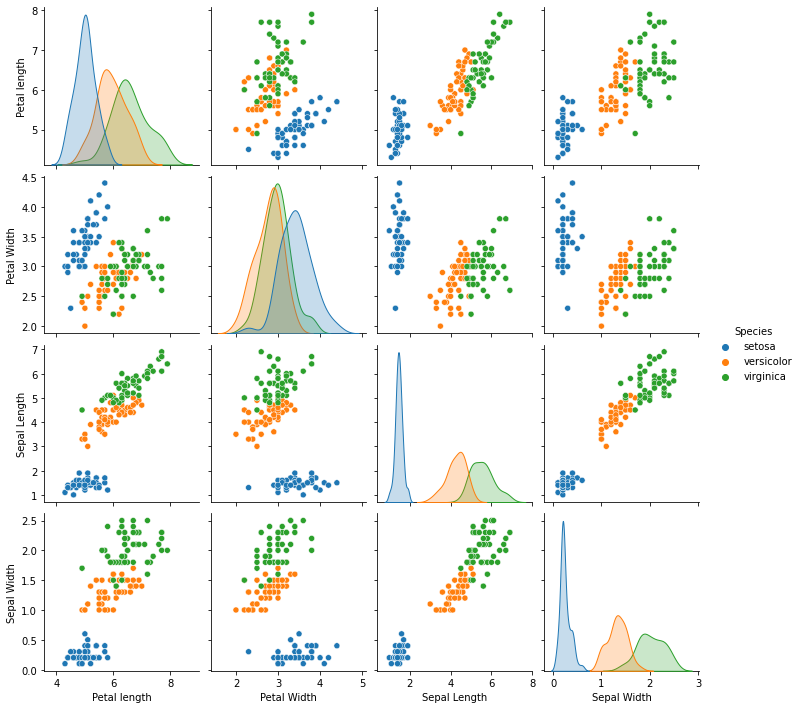

In [ ]:
sns.pairplot(data, hue='Species')
plt.show()

[]

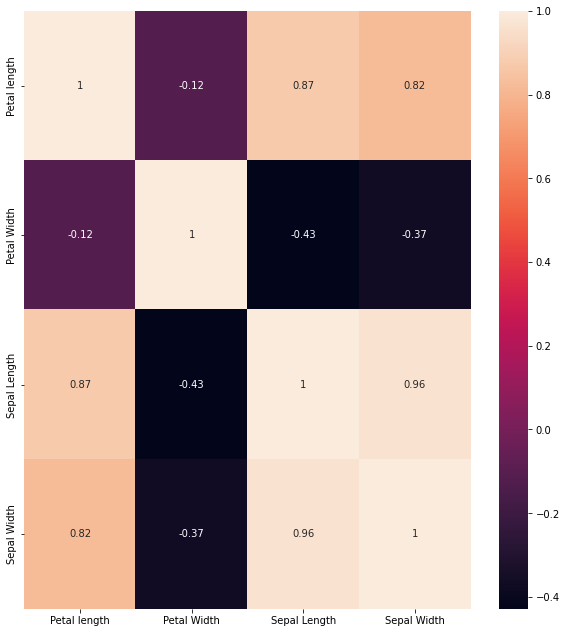

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

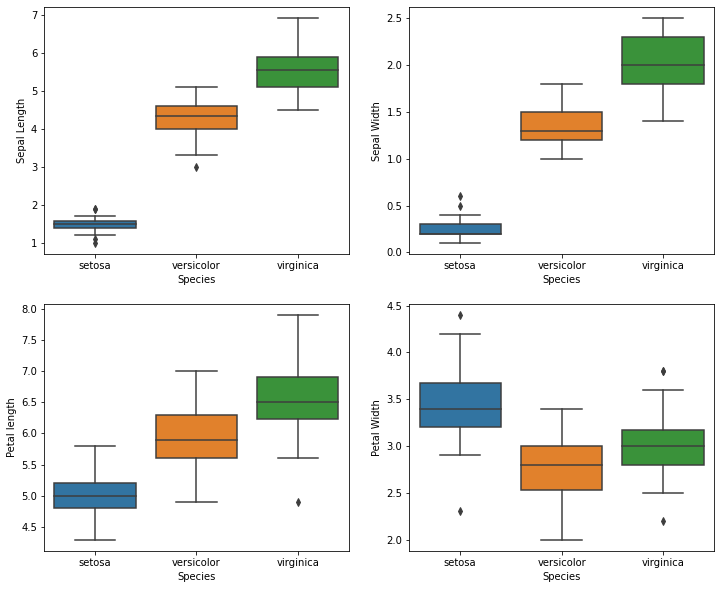

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

In [ ]:
X = data[["Sepal Length","Sepal Width","Petal length","Petal Width"]].values
Y = data['Species'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=1)

In [ ]:
#scikit learn decision tree model training 
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

In [ ]:
DT.predict(X_test)
prediction = DT.predict(X_test)
prediction = DT.predict(X_test)
prediction

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [ ]:
# evaluation for multi class classification
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
DT.score(X_test, Y_test)

1.0

In [ ]:
#prediction
Y_pred = DT.predict(X_test)

In [ ]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


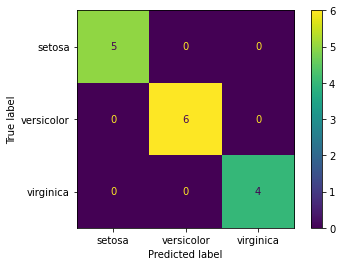

In [ ]:
plot_confusion_matrix(DT, X_test, Y_test)

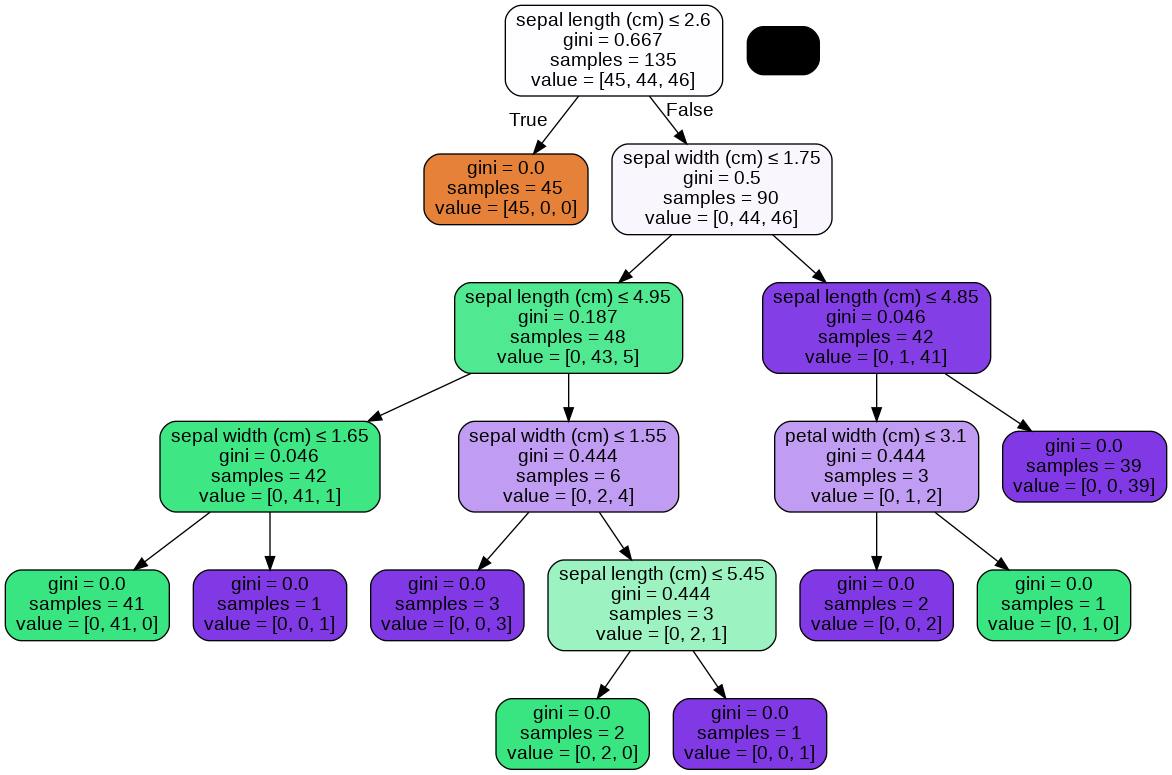

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
DT.predict([[4.8, 2.9, 1.3, 0.2]])

array(['virginica'], dtype=object)

In [ ]:
DT.predict([[3.5, 1.9, 5.2, 2.4]])

array(['virginica'], dtype=object)

In [ ]:
DT.predict([[4.6, 2.9, 3.6, 5.9]])

array(['versicolor'], dtype=object)